# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Naufal Rahmatullah
- **Email:** mc253d5y0305@student.devacademy.id
- **ID Dicoding:** MC253D5Y0305

## Menentukan Pertanyaan Bisnis

- Bagaimana popularitas atau tren Bike Sharing dalam tahun tersebut, di tahun berapa yang lebih banyak pemakainya?
- Bagaimana pengaruh cuaca terhadap perkembangan bike sharing yang mungkin menjadi pendukung atau bahkan tantangan terhadap potensi market yang telah ditemukan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
fileDay = pd.read_csv("Dashboard\day.csv")
fileHour = pd.read_csv("Data\hour.csv")
print(fileDay)
print(fileHour)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16908\3449753464.py:1: SyntaxWarning: invalid escape sequence '\d'
  fileDay = pd.read_csv("Dashboard\day.csv")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16908\3449753464.py:2: SyntaxWarning: invalid escape sequence '\h'
  fileHour = pd.read_csv("Data\hour.csv")


**Insight:**
- dari file Day, dapat dilihat ada 8 kolom mulai dari instant, date, season, year, month, dan lainnya.
- dari file Hour, dapat dilihat ada 7 kolom, mulai dari weathersit, temp, attemp, dan lain lain.

### Assessing Data

Assess data file Day

In [4]:
fileDay.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dari sisi missing value, tidak ditemukan pada file tersebut.

In [5]:
fileDay.duplicated().sum()

np.int64(0)

Dari sisi data yang terduplikasi juga tidak ada.


Assess data Hours

In [6]:
fileHour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
fileHour.duplicated().sum()

np.int64(0)

tidak ada juga terindikasi duplikasi data, jadi saya simpulkan data file dan hours bersih.

In [8]:
dfDay = pd.DataFrame(fileDay)
dfHour = pd.DataFrame(fileHour)
dfDay.info()
dfHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [9]:
dfDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
Setelah di cek saya tidak menemukan data yang terduplikasi ataupun missing value, namun terdapat ketidak sesuaian tipe data pada kolom dteday yang awalnya object menjadi datetime

In [10]:
merged_df = pd.merge(dfDay, dfHour[['dteday', 'hr']], on='dteday', how='inner')

merged_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


**Insight:**
Karena dari kedua tabel tersebut hanya ada satu perbedaan yaitu pada kolom hr pada dataframe hours, maka saya memutuskan untuk menyatukannya menjadi satu tabel.

### Cleaning Data

In [11]:
merged_df['mnth'] = merged_df['mnth'].map({
    1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'September',11:'November',12:'December'
})

Memberikan Penamaan bulan, serta kondisi cuaca, musim

In [12]:
merged_df['season'] = merged_df['season'].map({
    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}).astype('category')

merged_df['weekday'] = merged_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}).astype('category')

merged_df['holiday'] = merged_df['holiday'].map({
    0: 'No', 1: 'Yes'
}).astype('category')

merged_df['workingday'] = merged_df['workingday'].map({
    0: 'No', 1: 'Yes'
}).astype('category')
merged_df['weathersit'] = merged_df['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}).astype('category')

print(merged_df[['weekday', 'holiday', 'weathersit']].dtypes)

print(merged_df['season'].dtype)

weekday       category
holiday       category
weathersit    category
dtype: object
category


Lalu pemberian penamaan pada setiap tipe data pada kolom season, weekday, holiday, dan weathersit untuk mengirangi kebingungan.

In [13]:
merged_df = merged_df.drop(columns = ['hum','windspeed'])
merged_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt,hr
0,1,2011-01-01,Winter,0,January,No,Saturday,No,Mist,0.344167,0.363625,331,654,985,0
1,1,2011-01-01,Winter,0,January,No,Saturday,No,Mist,0.344167,0.363625,331,654,985,1
2,1,2011-01-01,Winter,0,January,No,Saturday,No,Mist,0.344167,0.363625,331,654,985,2
3,1,2011-01-01,Winter,0,January,No,Saturday,No,Mist,0.344167,0.363625,331,654,985,3
4,1,2011-01-01,Winter,0,January,No,Saturday,No,Mist,0.344167,0.363625,331,654,985,4


**Insight:**
Kegiatan cleaning drop kolom hum dan windspeed karena tidak berkaitan dengan pertanyaan bisnis

## Exploratory Data Analysis (EDA)

### Explore data untuk mengelompokkan kegunaan sepeda berdasarkan hari


In [14]:
holiday_data = merged_df[merged_df['holiday'] == 'Yes'].groupby('mnth')['cnt'].sum()
workingday_data = merged_df[merged_df['holiday'] == 'No'].groupby('mnth')['cnt'].sum()

Data diatas adalah clustering dari merged_df guna mengelompokkan pengguna yang memakai sepeda saat workingday dan holiday saja.

In [15]:
mist_data = merged_df[merged_df['weathersit'] == 'Mist'].groupby('mnth')['cnt'].sum()
clear_data = merged_df[merged_df['weathersit'] == 'Clear'].groupby('mnth')['cnt'].sum()
lightrain_data = merged_df[merged_df['weathersit'] == 'Light Rain/Snow'].groupby('mnth')['cnt'].sum()
Heavyrain_data = merged_df[merged_df['weathersit'] == 'Heavy Rain/Snow'].groupby('mnth')['cnt'].sum()

Data diatas adalah hasil dari deklarasi 4 variabel yang tujuannya untuk mengelompokkan user yang menggunakan sepeda tergantung cuacanya.

In [16]:
dataHolidayUser = merged_df[merged_df['holiday'] == 'Yes'][['dteday', 'casual', 'registered']]
print(dataHolidayUser)

           dteday  casual  registered
372    2011-01-17     117         883
373    2011-01-17     117         883
374    2011-01-17     117         883
375    2011-01-17     117         883
376    2011-01-17     117         883
...           ...     ...         ...
17230  2012-12-25     440         573
17231  2012-12-25     440         573
17232  2012-12-25     440         573
17233  2012-12-25     440         573
17234  2012-12-25     440         573

[500 rows x 3 columns]


In [17]:

dataHolidayUser['total_users'] = dataHolidayUser['casual'] + dataHolidayUser['registered']
totalHolidayUser = dataHolidayUser['total_users'].sum()
print("Total seluruh pengguna selama hari libur:", totalHolidayUser)


Total seluruh pengguna selama hari libur: 1875030


dapat dilihat diatas tempo tertentu memiliki jumlah user diatas 1000, maka saya akan identifikasi dibulan apa saja.

In [18]:
dataWorkingdayUser = merged_df[merged_df['workingday'] == 'Yes'][['dteday', 'casual', 'registered']]
print(dataWorkingdayUser)

           dteday  casual  registered
47     2011-01-03     120        1229
48     2011-01-03     120        1229
49     2011-01-03     120        1229
50     2011-01-03     120        1229
51     2011-01-03     120        1229
...           ...     ...         ...
17374  2012-12-31     439        2290
17375  2012-12-31     439        2290
17376  2012-12-31     439        2290
17377  2012-12-31     439        2290
17378  2012-12-31     439        2290

[11865 rows x 3 columns]


In [19]:

dataWorkingdayUser['total_users'] = dataWorkingdayUser['casual'] + dataWorkingdayUser['registered']
totalWorkingUsers = dataWorkingdayUser['total_users'].sum()
print("Total seluruh pengguna selama hari kerja:", totalWorkingUsers)


Total seluruh pengguna selama hari kerja: 54850177


In [20]:
merged_df.groupby('mnth')[['cnt']].agg(['max', 'min', 'mean', 'sum']) \
     .sort_values(('cnt', 'mean'), ascending=False)

cnt                             
            max   min         mean       sum
mnth                                        
June       8120  3767  5772.366667   8312208
August     7865  1115  5689.239322   8391628
July       8173  3285  5563.677419   8278752
September  8714    22  5544.940789  16013789
May        8294  2633  5349.774194   7960464
April      7460   795  4484.418928   6444110
November   6852  1495  4245.956159   6101439
March      8362   605  3709.164969   5463600
December   6606   441  3411.030344   5058558
February   5062  1005  2671.260999   3582161
January    4521   431  2228.370189   3184341

In [21]:
dataHolidayUser = merged_df[merged_df['holiday'] == 'Yes'][['dteday', 'casual', 'registered']]
dataHolidayUser['total_users'] = dataHolidayUser['casual'] + dataHolidayUser['registered']

In [22]:
meanAllUsers = merged_df['cnt'].mean()
print("Rata-rata total pengguna:", meanAllUsers)

Rata-rata total pengguna: 4533.692962771161


**Insight:**
- setelah melakukan pengumpulan data mengenai perbandingan saat user memakai bike disaat holiday atau workingday dapat disimpulkan saat workingday penggunaan lebih tinggi.
- setelah melakukan penghitungan rata rata dari seluruh jumlah user, dapat ditemukan jarak waktu kapan user akan memakai bike

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan dari kepentingan user terhadap pemakaian Bike Sharing?


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16908\2484727893.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data2011 = merged_df[merged_df['yr'] == 0].groupby('mnth')['cnt'].sum().sort_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16908\2484727893.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data2012 = merged_df[merged_df['yr'] == 1].groupby('mnth')['cnt'].sum().sort_index()


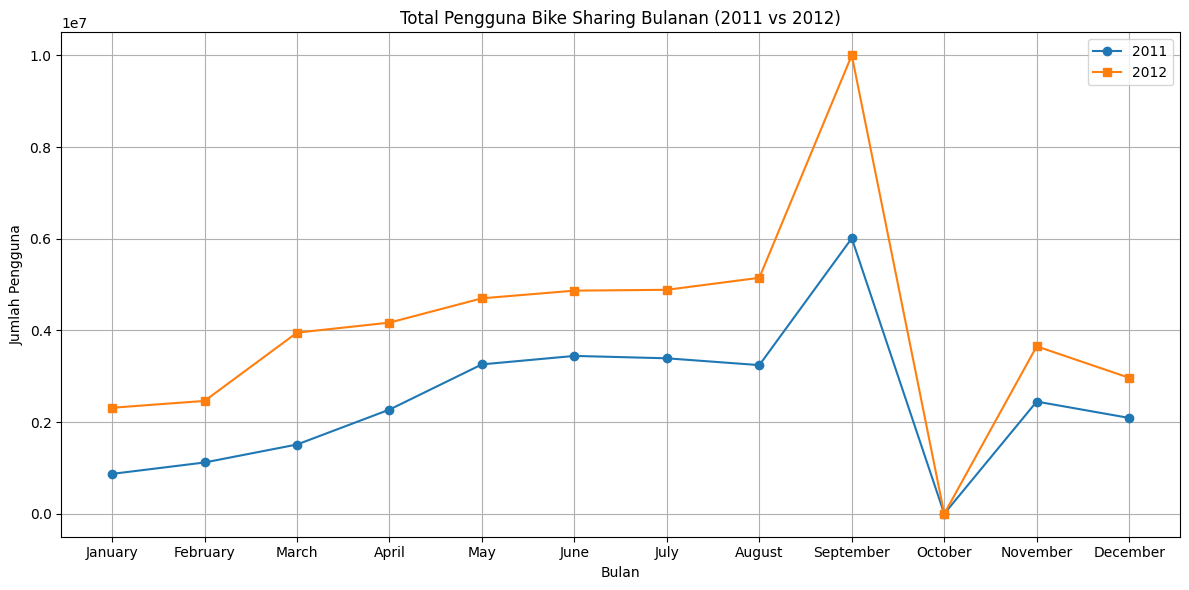

In [33]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
merged_df['mnth'] = pd.Categorical(merged_df['mnth'], categories=month_order, ordered=True)
data2011 = merged_df[merged_df['yr'] == 0].groupby('mnth')['cnt'].sum().sort_index()
data2012 = merged_df[merged_df['yr'] == 1].groupby('mnth')['cnt'].sum().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(data2011.index, data2011.values, marker='o', label='2011')
plt.plot(data2012.index, data2012.values, marker='s', label='2012')
plt.title('Total Pengguna Bike Sharing Bulanan (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Setelah visualisasi keduanya, saya akan membandingkannya dengan cara menyatukannya.

**Insight:**
- setelah melakukan pengelompokkan data berdasarkan tahunnya, dapat disimpulkan tren tersebut naik jika dibangdingkan dengan tahun sebelumnya.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap perkembangan bike sharing yang mungkin menjadi pendukung atau bahkan tantangan terhadap potensi market yang telah ditemukan?

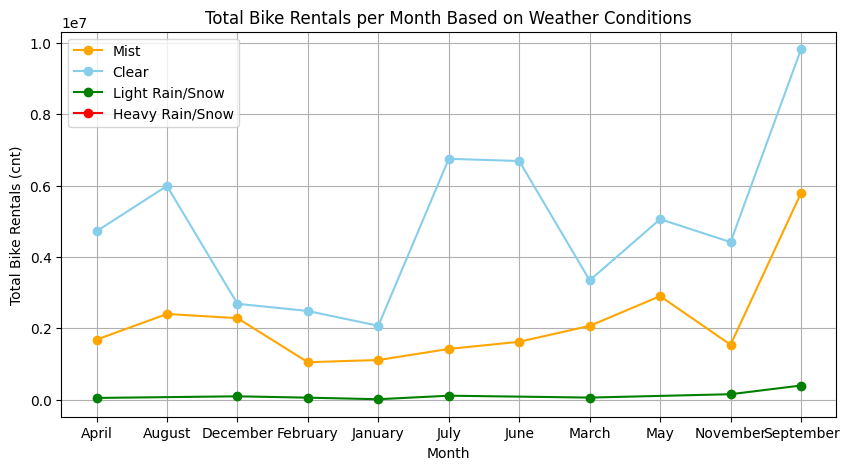

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(mist_data.index, mist_data.values, label='Mist', marker='o', color='orange')
plt.plot(clear_data.index, clear_data.values, label='Clear', marker='o', color='skyblue')
plt.plot(lightrain_data.index, lightrain_data.values, label='Light Rain/Snow', marker='o', color='green')
plt.plot(Heavyrain_data.index, Heavyrain_data.values, label='Heavy Rain/Snow', marker='o', color='red')

plt.grid(True)

plt.title('Total Bike Rentals per Month Based on Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals (cnt)')

plt.legend()

plt.show()

Text(0, 0.5, 'total user')

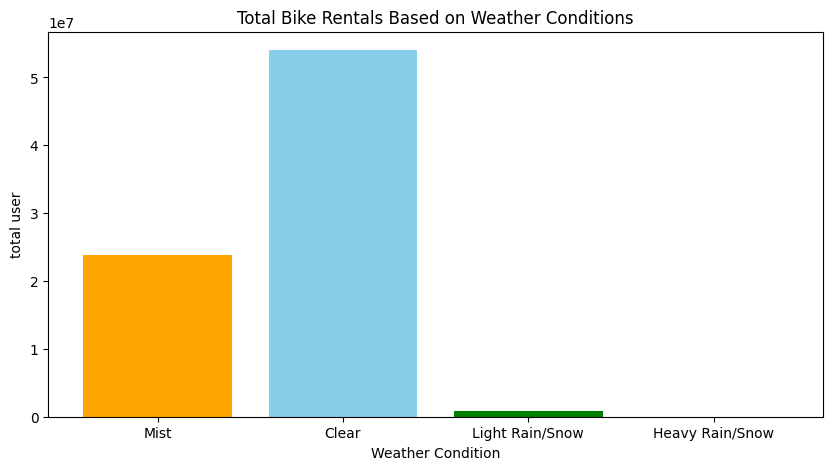

In [ ]:
weather_data = {
    'Mist': mist_data.sum(),
    'Clear': clear_data.sum(),
    'Light Rain/Snow': lightrain_data.sum(),
    'Heavy Rain/Snow': Heavyrain_data.sum(),
}

# Creating a bar chart
plt.figure(figsize=(10, 5))
plt.bar(weather_data.keys(), weather_data.values(), color=['orange', 'skyblue', 'green', 'red'])

# Adding labels and title
plt.title('Total Bike Rentals Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('total user')

**Insight:**
- Perbandingan di grafik tersebut memperlihatkan betapa kontrasnya perbedaan pengguna saat cuaca Clear, lightrain, dan heavyrain.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Dengan kontras yang sangat jauh antara pengguna setelah melakukan perbandingan antara Workingday dan Holiday, Kemungkinan besar pengguna Menggunakannya untuk kemudahan mobilitas mereka saat bekerja.
- Conclution pertanyaan 2: Ternyata pengaruh cuaca terhadap penggunaan Bike sangat berpengaruh terutama saat cuaca Clear. Penggunaan di bulan september meningkat drastis dari November.Tantangan terbesar User bike Sharing terletak pada cuaca yang sedikit hujan dahkan hujan deras. Bisa dilihat di grafik hijau dan orange bahwa pemakaian termasuk sedikit dibandingkan saat cuaca Clear.